# Bloom Filter

### This notebook demonstrates the implementation of Bloom filter, hash functions family and their testing, as well as HPC experiments performed as a part of the project.

*The notebook assumes you have already familiarized yourself with the implementation part (**bloom_filter** and **data** folders) and continues with hash function testing*.

## Hash function testing

Let's begin by importing the hash functions and data provider methods and see how each hash function performs on different types of data.

Testing with get_natural_language_words
MD5Hash - Chi-squared: 9888.00, p-value: 0.7832, Standard Deviation: 0.99
MurmurHash - Chi-squared: 10192.00, p-value: 0.0868, Standard Deviation: 1.01
CityHash - Chi-squared: 9964.00, p-value: 0.5960, Standard Deviation: 1.00
JenkinsOneAtATimeHash - Chi-squared: 9844.00, p-value: 0.8637, Standard Deviation: 0.99
Sha256Hash - Chi-squared: 9938.00, p-value: 0.6655, Standard Deviation: 1.00


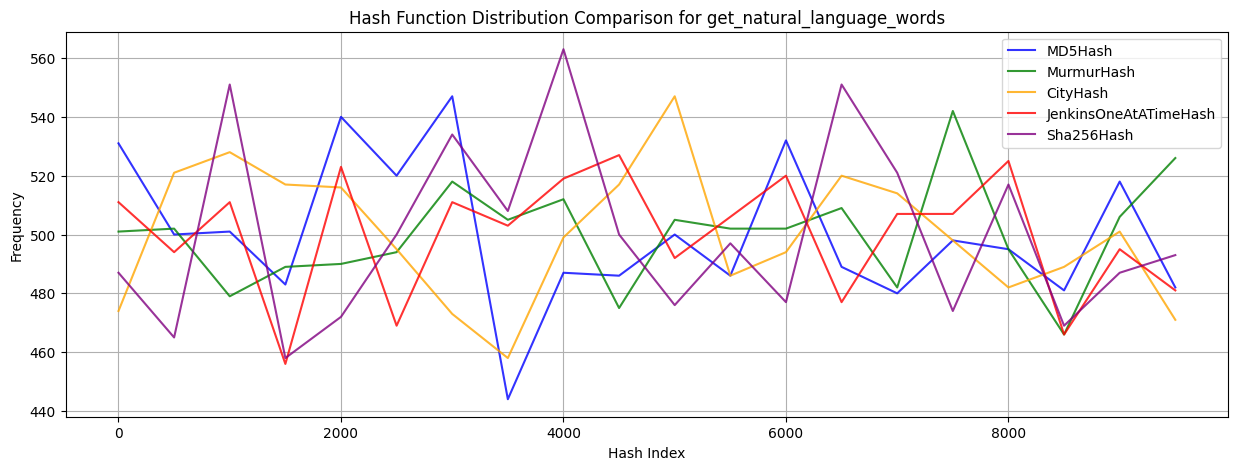

Testing with get_random_strings
MD5Hash - Chi-squared: 10454.00, p-value: 0.0008, Standard Deviation: 1.02
MurmurHash - Chi-squared: 10142.00, p-value: 0.1560, Standard Deviation: 1.01
CityHash - Chi-squared: 10012.00, p-value: 0.4615, Standard Deviation: 1.00
JenkinsOneAtATimeHash - Chi-squared: 10100.00, p-value: 0.2368, Standard Deviation: 1.00
Sha256Hash - Chi-squared: 10212.00, p-value: 0.0668, Standard Deviation: 1.01


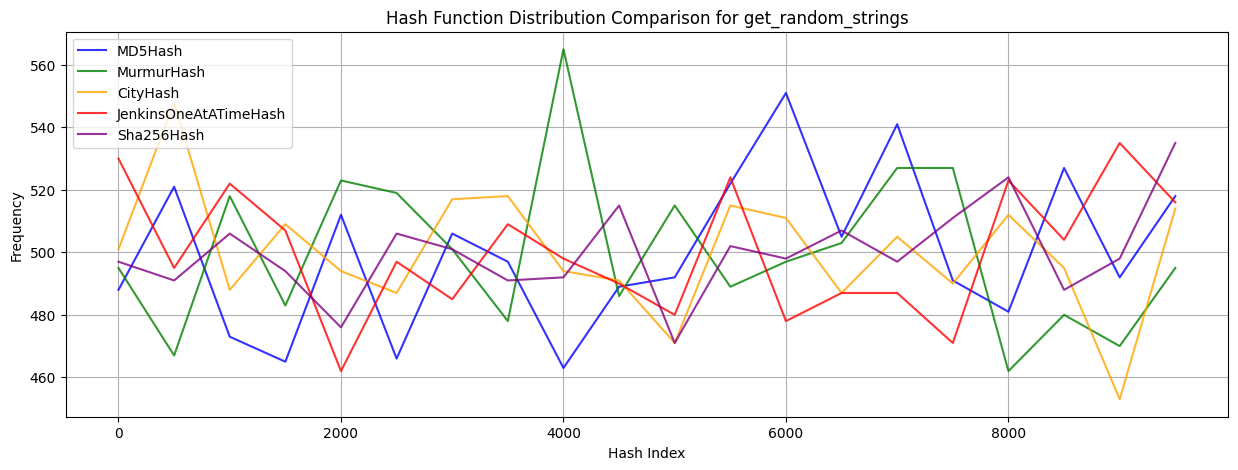

Testing with get_dna_sequences
MD5Hash - Chi-squared: 10300.00, p-value: 0.0173, Standard Deviation: 1.01
MurmurHash - Chi-squared: 9938.00, p-value: 0.6655, Standard Deviation: 1.00
CityHash - Chi-squared: 9954.00, p-value: 0.6232, Standard Deviation: 1.00
JenkinsOneAtATimeHash - Chi-squared: 9814.00, p-value: 0.9052, Standard Deviation: 0.99
Sha256Hash - Chi-squared: 10204.00, p-value: 0.0743, Standard Deviation: 1.01


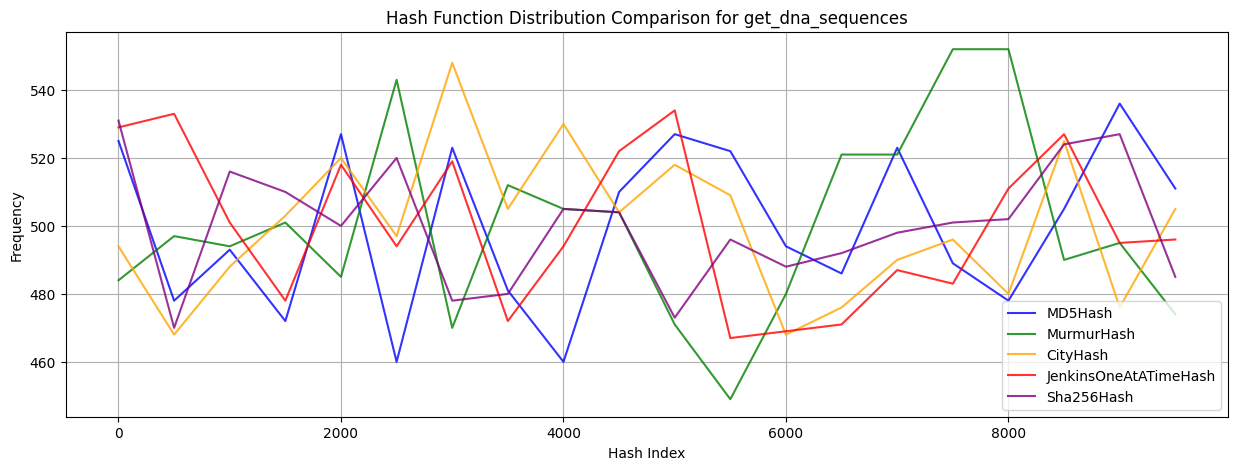

Testing with get_urls
MD5Hash - Chi-squared: 10024.00, p-value: 0.4280, Standard Deviation: 1.00
MurmurHash - Chi-squared: 9824.00, p-value: 0.8925, Standard Deviation: 0.99
CityHash - Chi-squared: 9906.00, p-value: 0.7438, Standard Deviation: 1.00
JenkinsOneAtATimeHash - Chi-squared: 9940.00, p-value: 0.6603, Standard Deviation: 1.00
Sha256Hash - Chi-squared: 10104.00, p-value: 0.2282, Standard Deviation: 1.01


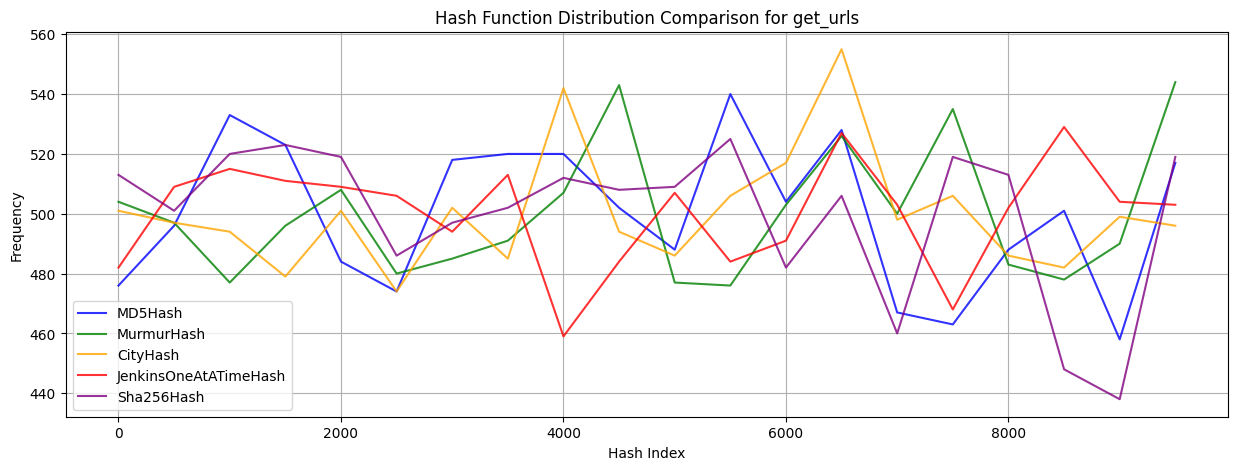

In [79]:
from bloom_filter.hash_functions.md5_hash import MD5Hash
from bloom_filter.hash_functions.murmur_hash import MurmurHash
from bloom_filter.hash_functions.city_hash import CityHash
from bloom_filter.hash_functions.jenkins_one_at_a_time_hash import JenkinsOneAtATimeHash
from bloom_filter.hash_functions.sha256_hash import Sha256Hash

from data.data_generator import get_natural_language_words, get_random_strings, get_dna_sequences, get_urls

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chisquare
import random
random.seed(42) # For reproducibility

all_hash_functions = [MD5Hash(), MurmurHash(), CityHash(), JenkinsOneAtATimeHash(), Sha256Hash()]
plot_colors = ['blue', 'green', 'orange', 'red', 'purple']
# Get data provider methods as objects to automatize testing
data_providers = [get_natural_language_words, get_random_strings, get_dna_sequences, get_urls]

hashing_size = 10000
number_of_hashes = 10000

for data_provider in data_providers:
    print(f"Testing with {data_provider.__name__}")
    # Prepare plot
    plt.figure(figsize=(15, 5))
    
    # Same dataset for each function
    dataset = data_provider(number_of_hashes)
    
    for plot_color, hash_fn in zip(plot_colors, all_hash_functions):
        hash_fn_name = hash_fn.__class__.__name__
        distribution = [0] * hashing_size
        for word in dataset:
            index = hash_fn.hash(word) % hashing_size
            distribution[index] += 1

        # Aggregation by binning in 20 bins
        bin_size = int(hashing_size/20)
        aggregated_distribution = [
            sum(distribution[i:i + bin_size]) for i in range(0, hashing_size, bin_size)
        ]
        aggregated_x = range(0, hashing_size, bin_size)
        plt.plot(aggregated_x, aggregated_distribution, label=hash_fn_name, color=plot_color, alpha=0.8, linewidth=1.5)

        # Statistical analysis is performed to see how close the distributions are to normal
        expected_mean = np.mean(distribution)
        chi2, p = chisquare(distribution)
        standard_deviation = np.std(distribution)
        print(f"{hash_fn_name} - Chi-squared: {chi2:.2f}, p-value: {p:.4f}, Standard Deviation: {standard_deviation:.2f}")

    
    plt.xlabel('Hash Index')
    plt.ylabel('Frequency')
    plt.title(f"Hash Function Distribution Comparison for {data_provider.__name__}")
    plt.legend()
    plt.grid(True)
    plt.show()

### Analysis of the results

- For the first type of data - natural English words, the best choices based on the chi-squared statistics and p-values are JenkinsOneAtATimeHash and MD5 as both provide high p-values. SHA256 and CityHash also have a good distribution. MurmurHash has a slightly worse performance.
- For random strings, CityHash performs the best, followed by JenkinsOneAtATimeHash, Murmurhash and SHA-256. MD5 has a low p-value, so it may not be suitable for this use case.
- In DNA sequence testing, we can observe that the best fits are JenkinsOneAtATimeHash, MurmurHash and Cityhash with pretty high p-values. SHA256 performs OK, whereas MD5 is not that uniformly distributed.
- Lastly, for simulated URLs, all hashing functions were within acceptable limits, with the best performing being MurmurHash and the least SHA-256.

## Time and space complexity
This part is discussed in README.md

## 6.